# Body Fat Prediction

In [67]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
# Getting data

bodyfat = pd.read_csv("bodyfat.csv")

In [69]:
# DataFrame

df = pd.DataFrame(bodyfat)

In [4]:
# Splitting data

# import numpy as np

# def split_train_test(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [5]:
# Correlation

# corr_matrix =bodyfat.corr()
# corr_matrix["BodyFat"].sort_values(ascending=False)

In [70]:
labels = df['BodyFat']
features = df.drop(columns=['Density', 'BodyFat'])

In [7]:
# x = features
# y = labels

In [71]:
# Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(features)
y = labels

### Feature Selection

Pearson Correlation

In [72]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

num_feats = 5
cor_support, cor_feature = cor_selector(features, labels,num_feats)
print(str(len(cor_feature)), 'selected features')

5 selected features


Chi-Square

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

lab = LabelEncoder().fit_transform(labels)

features_norm = MinMaxScaler().fit_transform(features)
# labels_norm = LabelBinarizer(sparse_output=True).fit_transform(labels)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(features_norm, lab)
chi_support = chi_selector.get_support()
chi_feature = features.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

5 selected features


Recursive Feature Elimination (RFE)

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(features_norm, lab)
rfe_support = rfe_selector.get_support()
rfe_feature = features.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 13 features.
5 selected features


Lasso

In [83]:

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
embeded_lr_selector.fit(features_norm, lab)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = features.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
embeded_lr_feature

5 selected features


['Age', 'Chest', 'Abdomen', 'Biceps', 'Wrist']

Tree-based: SelectFromModel

In [76]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(features_norm, lab)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = features.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

5 selected features


In [9]:
# MinMaxScler

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler((0, 1))
# x = scaler.fit_transform(features)
# y = labels

In [77]:
# Splitting Dataframe

x = pd.DataFrame(x, columns = ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'])
x1 = x[['Abdomen']]
x2 = x[['Abdomen', 'Chest']]
x3 = x[['Abdomen', 'Chest', 'Hip']]
x4 = x[['Abdomen', 'Chest', 'Hip', 'Weight']]
x5 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh']]
x6 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee']]
x7 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee', 'Biceps']]
x8 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee', 'Biceps', 'Neck']]
x9 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee', 'Biceps', 'Neck', 'Forearm']]
x10 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist']]
x11 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist', 'Age']]
x12 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist', 'Age', 'Ankle']]
x13 = x[['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist', 'Age', 'Ankle', 'Height']]
x_pearson = x[cor_feature]
x_chi = x[chi_feature]
x_rfe = x[rfe_feature]
x_lasso = x[embeded_lr_feature]
x_embeded_rf = x[embeded_rf_feature]

In [78]:
# Setting training set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.3, random_state=42)
x3_train, x3_test, y_train, y_test = train_test_split(x3, y, test_size=0.3, random_state=42)
x4_train, x4_test, y_train, y_test = train_test_split(x4, y, test_size=0.3, random_state=42)
x5_train, x5_test, y_train, y_test = train_test_split(x5, y, test_size=0.3, random_state=42)
x6_train, x6_test, y_train, y_test = train_test_split(x6, y, test_size=0.3, random_state=42)
x7_train, x7_test, y_train, y_test = train_test_split(x7, y, test_size=0.3, random_state=42)
x8_train, x8_test, y_train, y_test = train_test_split(x8, y, test_size=0.3, random_state=42)
x9_train, x9_test, y_train, y_test = train_test_split(x9, y, test_size=0.3, random_state=42)
x10_train, x10_test, y_train, y_test = train_test_split(x10, y, test_size=0.3, random_state=42)
x11_train, x11_test, y_train, y_test = train_test_split(x11, y, test_size=0.3, random_state=42)
x12_train, x12_test, y_train, y_test = train_test_split(x12, y, test_size=0.3, random_state=42)
x_pearson_train, x_pearson_test, y_train, y_test = train_test_split(x_pearson, y, test_size=0.3, random_state=42)
x_chi_train, x_chi_test, y_train, y_test = train_test_split(x_chi, y, test_size=0.3, random_state=42)
x_rfe_train, x_rfe_test, y_train, y_test = train_test_split(x_rfe, y, test_size=0.3, random_state=42)
x_lasso_train, x_lasso_test, y_train, y_test = train_test_split(x_lasso, y, test_size=0.3, random_state=42)
x_embeded_rf_train, x_embeded_rf_test, y_train, y_test = train_test_split(x_embeded_rf, y, test_size=0.3, random_state=42)

In [12]:
# Transform from Pandas DataFrame to Numpy array

# from sklearn.base import BaseEstimator, TransformerMixin

# class DataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attribute_names):
#         self.attribute_names = attrribute_names
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[self.attribute_names].values

In [79]:
# Performance Evaluation Criteria

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
# from sklearn.metrics import d2_absolute_error_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error

# Linear Regression

### Model

In [80]:
# Model

from sklearn.linear_model import LinearRegression

def linRegModel(x_train, y_train = y_train):
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    return lin_reg

In [88]:
# Evaluating Model

def evaluatingLinReg(feature_count, x_train, x_test):
    # if feature_count < 2:
    #     print("For {} feature:".format(feature_count))
    # else:
    #     print("For {} features:".format(feature_count))
    y_pred = linRegModel(x_train).predict(x_test)
    print(explained_variance_score(y_test, y_pred).round(4),', ',
        max_error(y_test, y_pred).round(4),', ',
        mean_absolute_error(y_test, y_pred).round(4),', ',
        mean_squared_error(y_test, y_pred).round(4),', ',
        mean_squared_log_error(y_test, y_pred).round(4),', ',
        median_absolute_error(y_test, y_pred).round(4),', ',
        r2_score(y_test, y_pred).round(4),', ',
        mean_absolute_percentage_error(y_test, y_pred).round(4), '\n')  

    return 0

print('Linear Regression\n')
print("Pearson")
evaluatingLinReg(5, x_pearson_train, x_pearson_test)
print("Chi-Squared")
evaluatingLinReg(5, x_chi_train, x_chi_test)
print("RFE")
evaluatingLinReg(5, x_rfe_train, x_rfe_test)
print("Lasso")
evaluatingLinReg(5, x_lasso_train, x_lasso_test)
print("Embeded RF")
evaluatingLinReg(5, x_embeded_rf_train, x_embeded_rf_test)
print("Correlation")
# evaluatingLinReg(1, x1_train, x1_test)
# evaluatingLinReg(2, x2_train, x2_test)
# evaluatingLinReg(3, x3_train, x3_test)
# evaluatingLinReg(4, x4_train, x4_test)
evaluatingLinReg(5, x5_train, x5_test)
# evaluatingLinReg(6, x6_train, x6_test)
# evaluatingLinReg(7, x7_train, x7_test)
# evaluatingLinReg(8, x8_train, x8_test)
# evaluatingLinReg(9, x9_train, x9_test)
# evaluatingLinReg(10, x10_train, x10_test)
# evaluatingLinReg(11, x11_train, x11_test)
# evaluatingLinReg(12, x12_train, x12_test)


Linear Regression

Pearson
0.5793 ,  11.663 ,  3.7453 ,  21.7809 ,  0.0841 ,  3.5765 ,  0.5792 ,  0.2642 

Chi-Squared
0.5632 ,  13.3247 ,  3.8209 ,  22.6093 ,  0.0862 ,  3.5873 ,  0.5632 ,  0.2682 

RFE
0.5318 ,  12.1361 ,  4.2166 ,  25.2797 ,  0.1019 ,  4.4291 ,  0.5116 ,  0.3171 

Lasso
0.5508 ,  21.7972 ,  3.7109 ,  23.3309 ,  0.081 ,  3.2634 ,  0.5493 ,  0.2551 

Embeded RF
0.4919 ,  21.9118 ,  4.0273 ,  26.3828 ,  0.0878 ,  3.6365 ,  0.4903 ,  0.2805 

Correlation
0.5793 ,  11.663 ,  3.7453 ,  21.7809 ,  0.0841 ,  3.5765 ,  0.5792 ,  0.2642 



0

### Insights

In [18]:
from array import array


y_pred = linRegModel(x_train).predict(x_test)
mape =mean_absolute_percentage_error(y_test, y_pred).round(4)*100

bodyfat = bodyfat.filter(items = x_test.index, axis=0)

y_pred = y_pred.tolist()
d = {'y_test': y_test.round(2), 'y_pred': y_pred}
erro = pd.DataFrame(data=d)

bodyfat_erro = pd.concat([bodyfat, erro], axis=1)

bodyfat_erro['erro'] = bodyfat_erro['y_test'] - bodyfat_erro['y_pred']


In [19]:
weight = [bodyfat_erro.Weight]
height = [bodyfat_erro.Height]
age = [bodyfat_erro.Age]
abdomen = [bodyfat_erro.Abdomen]
neck = [bodyfat_erro.Neck]
chest = [bodyfat_erro.Chest]
hip = [bodyfat_erro.Hip]
thigh = [bodyfat_erro.Thigh]
knee = [bodyfat_erro.Knee]
ankle = [bodyfat_erro.Ankle]
biceps = [bodyfat_erro.Biceps]
forearm = [bodyfat_erro.Forearm]
wrist = [bodyfat_erro.Wrist]

In [20]:
bodyfat_erro

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,y_test,y_pred,erro
165,1.0549,19.2,35,217.00,73.75,40.5,107.5,95.1,104.5,64.8,41.3,25.6,36.4,33.7,19.4,19.2,16.714373,2.485627
6,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7,19.2,16.212754,2.987246
111,1.0355,28.0,43,183.25,70.00,37.1,108.0,105.0,103.0,63.7,40.0,23.6,33.5,27.8,17.4,28.0,33.155233,-5.155233
172,1.0521,20.5,35,177.25,71.00,38.4,100.5,90.3,98.7,57.8,37.3,22.4,31.0,28.7,17.7,20.5,16.353981,4.146019
115,1.0607,16.7,40,158.00,69.25,36.3,97.0,86.6,92.6,55.9,36.3,22.1,29.8,26.3,17.3,16.7,16.451048,0.248952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1.0575,18.1,44,187.50,72.25,38.0,101.8,87.5,101.0,58.5,39.2,24.5,32.1,28.6,18.0,18.1,12.900121,5.199879
75,1.0666,18.5,61,148.25,67.50,36.0,91.6,81.8,94.8,54.5,37.0,21.4,29.3,27.0,18.3,18.5,12.193923,6.306077
113,1.0503,21.3,42,163.00,70.25,35.3,93.5,89.6,99.8,61.5,37.8,21.9,30.7,27.6,17.4,21.3,19.562362,1.737638
118,1.0404,25.8,40,191.00,74.00,38.3,95.4,92.4,104.3,64.6,41.1,24.8,33.6,29.5,18.5,25.8,18.059797,7.740203


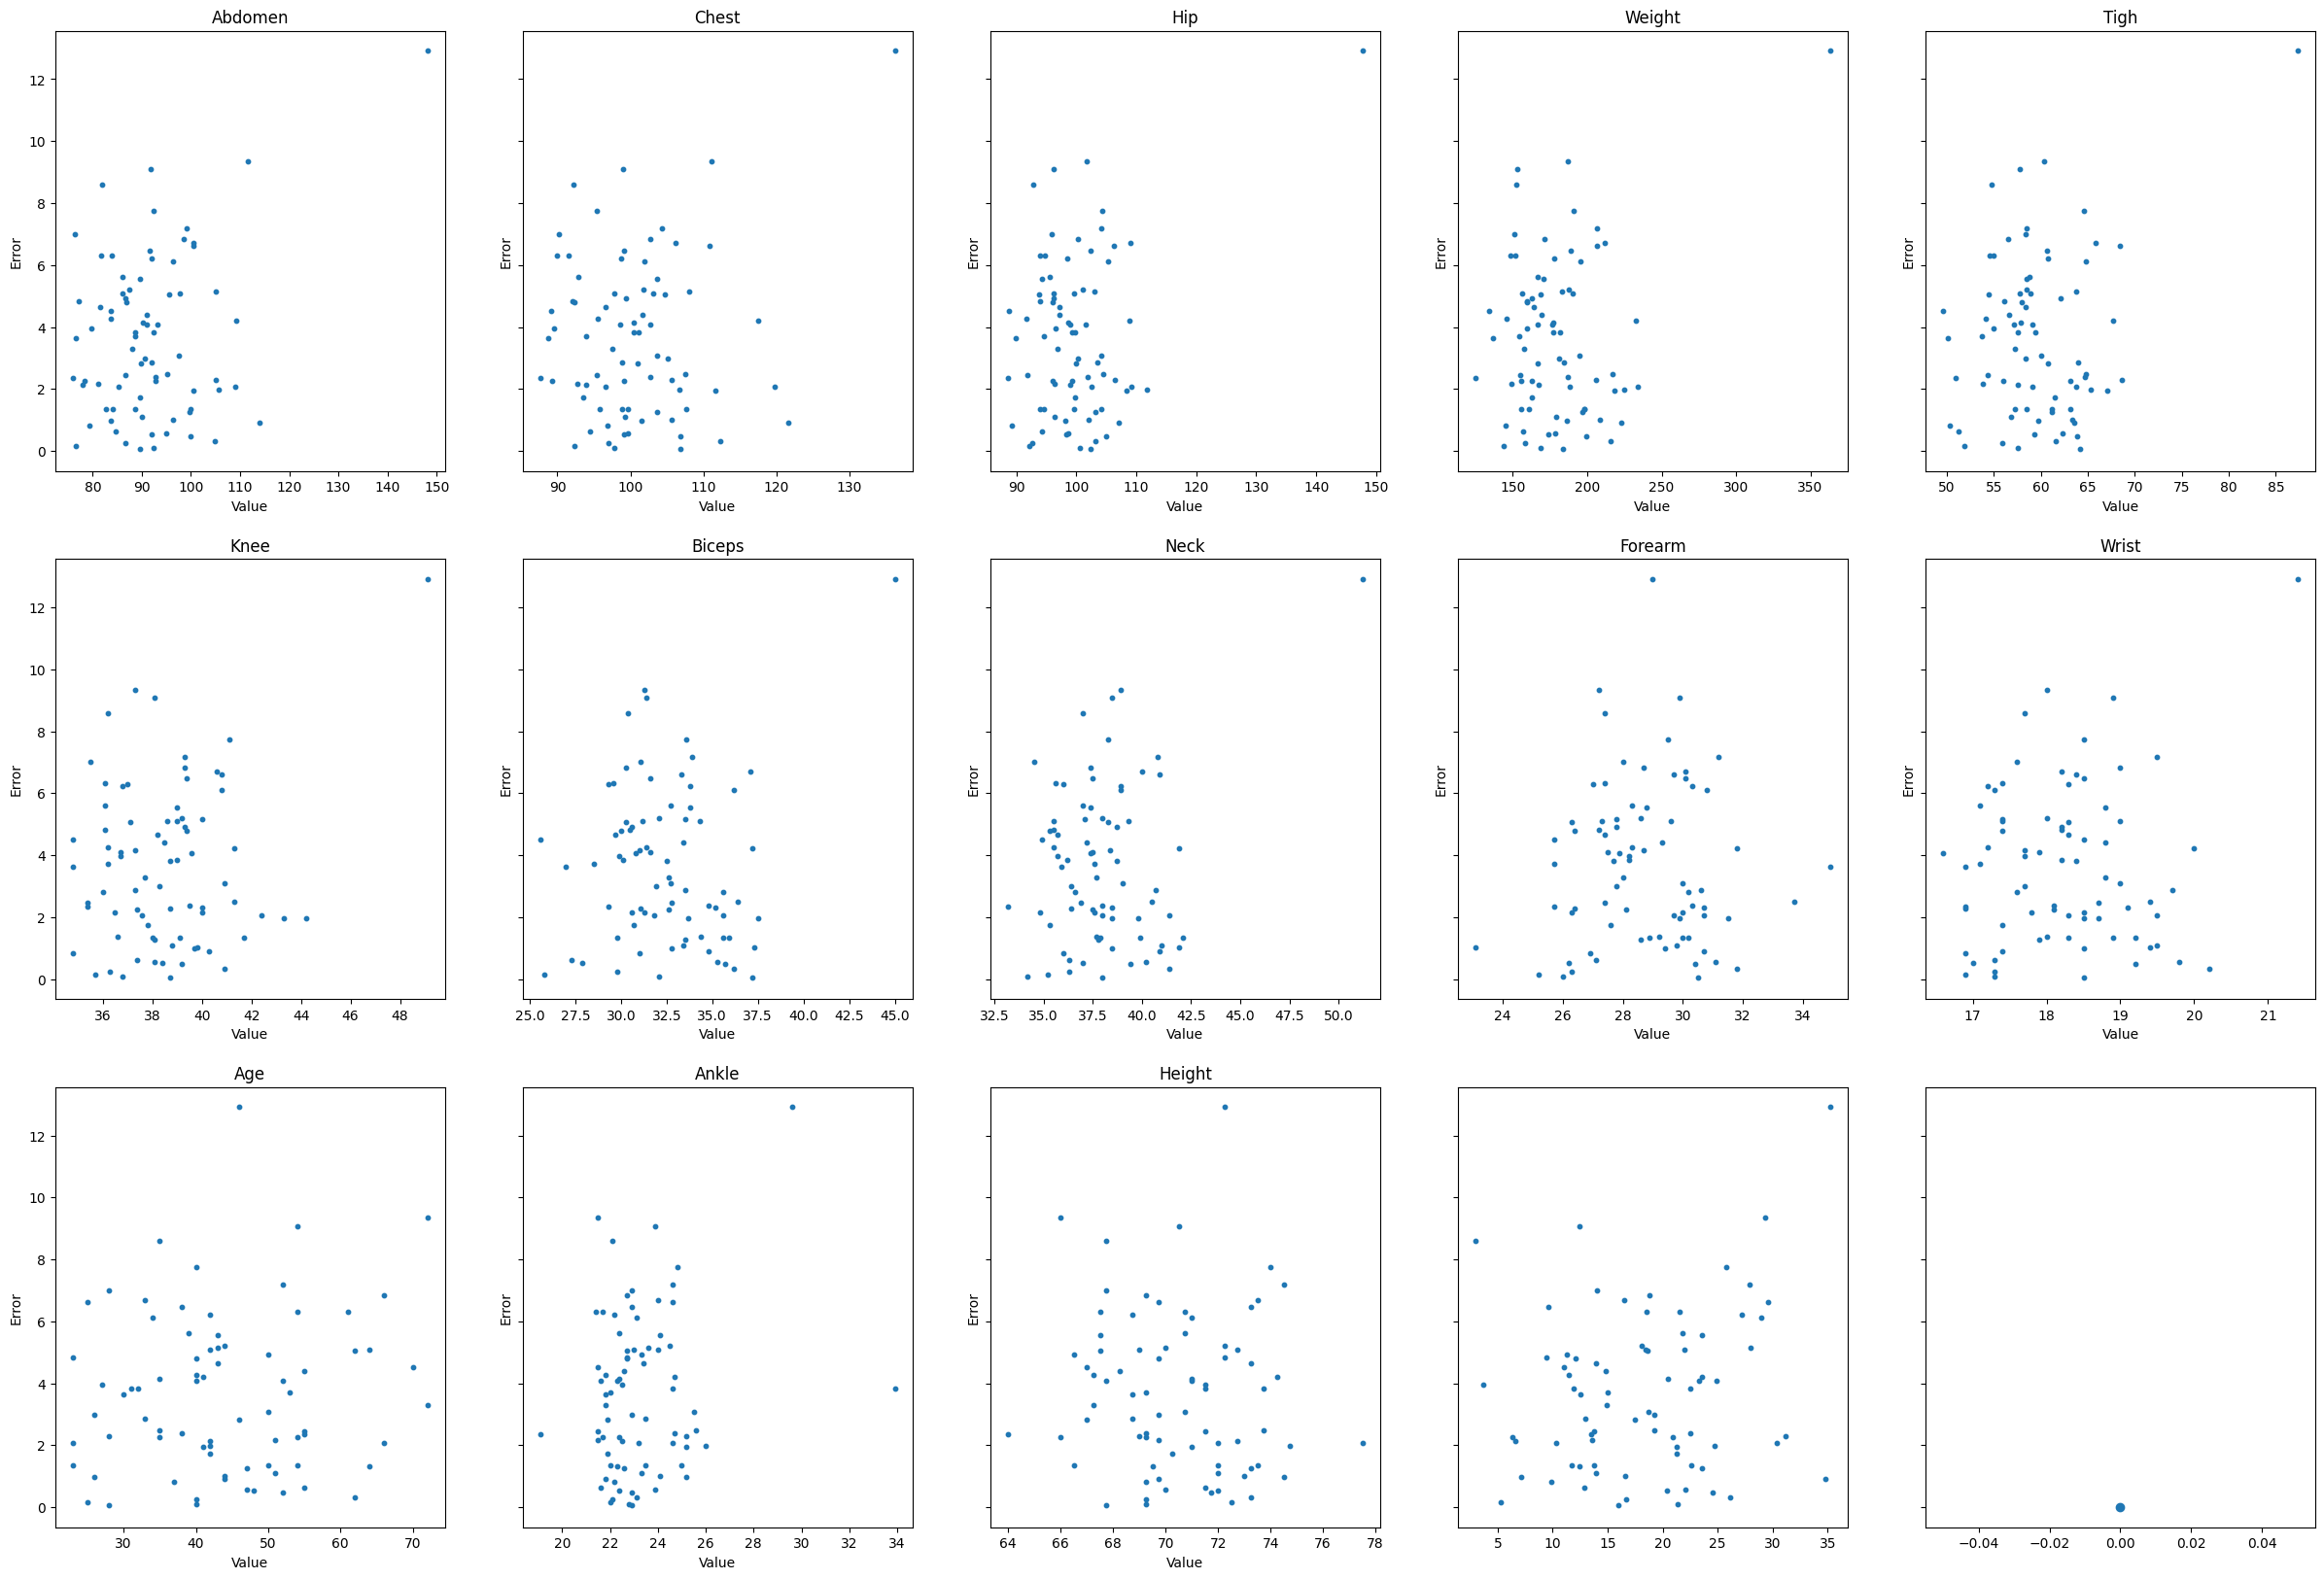

In [21]:
feature_names = ['Abdomen', 'Chest', 'Hip', 'Weight', 'Tigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist', 'Age', 'Ankle', 'Height']
fig2, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(ncols=5, nrows=3, sharey=True, figsize=(30,20))
y = bodyfat_erro['y_test']-bodyfat_erro['y_pred']
y = y.abs()

ax1.scatter(abdomen, y, s=10)
ax2.scatter(chest, y, s=10)
ax3.scatter(hip, y, s=10)
ax4.scatter(weight, y, s=10)
ax5.scatter(thigh, y, s=10)
ax6.scatter(knee, y, s=10)
ax7.scatter(biceps, y, s=10)
ax8.scatter(neck, y, s=10)
ax9.scatter(forearm, y, s=10)
ax10.scatter(wrist, y, s=10)
ax11.scatter(age, y, s=10)
ax12.scatter(ankle, y, s=10)
ax13.scatter(height, y, s=10)
ax14.scatter(y_test,y, s=10)
ax15.scatter(0,0)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13]
for i in range(len(feature_names)):
    axes[i].set_title(feature_names[i])
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Error')

In [22]:
# MEAN ERROR (ALL TEST SET)
count_all = bodyfat_erro['erro'].count()
all = bodyfat_erro['erro'] = bodyfat_erro['erro'].abs()
all = all.mean()
print('For ALL data set''\n'
      'Available sample:' , count_all, '\n'
      'Mean Error:' , all.round(2), '\n')

# MEAN ERROR ULTRA LEAN (5 - 8)
ultra_lean = bodyfat_erro[(bodyfat_erro['BodyFat'] >= 5) & (bodyfat_erro['BodyFat'] <= 8)]
count_ultra_lean = ultra_lean['erro'].count()
ultra_lean = ultra_lean['erro'].abs()
ultra_lean = ultra_lean.mean()
print('Moderately Lean (5% to 8%)''\n'
      'Available sample:' , count_ultra_lean, '\n'
      'Mean Error:' , ultra_lean.round(2), '\n')

# MEAN ERROR LEAN (8 - 12) 
lean = bodyfat_erro[(bodyfat_erro['BodyFat'] > 8) & (bodyfat_erro['BodyFat'] <= 12)]
count_lean = lean['erro'].count()
lean = lean['erro'].abs()
lean = lean.mean()
print('Moderately Lean (8% to 12%)''\n'
      'Available sample:' , count_lean, '\n'
      'Mean Error:' , lean.round(2), '\n')

# MEAN ERROR MODERATELY LEAN (12 - 20)
moderately_lean = bodyfat_erro[(bodyfat_erro['BodyFat'] > 12) & (bodyfat_erro['BodyFat'] <= 20)]
count_moderately_lean = moderately_lean['erro'].count()
moderately_lean = moderately_lean['erro'].abs()
moderately_lean = moderately_lean.mean()
print('Moderately Lean (12% to 20%)''\n'
      'Available sample:' , count_moderately_lean, '\n'
      'Mean Error:' , moderately_lean.round(2), '\n')

# MEAN ERROR EXCESS FAT (20 - 30)
excess_fat = bodyfat_erro[(bodyfat_erro['BodyFat'] > 20) & (bodyfat_erro['BodyFat'] <= 30)]
count_excess_fat = excess_fat['erro'].count()
excess_fat = excess_fat['erro'].abs()
excess_fat = excess_fat.mean()
print('Excess Fat (20% to 30%)''\n'
      'Available sample:' , count_excess_fat, '\n'
      'Mean Error:' , excess_fat.round(2))

For ALL data set
Available sample: 76 
Mean Error: 3.66 

Moderately Lean (5% to 8%)
Available sample: 4 
Mean Error: 1.38 

Moderately Lean (8% to 12%)
Available sample: 9 
Mean Error: 3.67 

Moderately Lean (12% to 20%)
Available sample: 29 
Mean Error: 3.54 

Excess Fat (20% to 30%)
Available sample: 28 
Mean Error: 3.79


In [28]:
# MEAN ERROR ULTRA LEAN (18 - 25)
teen = bodyfat_erro[(bodyfat_erro['Age'] >= 18) & (bodyfat_erro['Age'] <= 25)]
count_teen = teen['erro'].count()
teen = teen['erro'].abs()
teen = teen.mean()
print('Moderately Lean (18% to 25%)''\n'
      'Available sample:' , count_teen, '\n'
      'Mean Error:' , teen.round(2), '\n')


# MEAN ERROR ULTRA LEAN (25 - 35)
adult = bodyfat_erro[(bodyfat_erro['Age'] > 25) & (bodyfat_erro['Age'] <= 35)]
count_adult = adult['erro'].count()
adult = adult['erro'].abs()
adult = adult.mean()
print('Moderately Lean (25% to 30%)''\n'
      'Available sample:' , count_adult, '\n'
      'Mean Error:' , adult.round(2), '\n')


      
# MEAN ERROR ULTRA LEAN (35 - 50)
old = bodyfat_erro[(bodyfat_erro['Age'] > 35) & (bodyfat_erro['Age'] <= 50)]
count_old = old['erro'].count()
old = old['erro'].abs()
old = old.mean()
print('Moderately Lean (25% to 30%)''\n'
      'Available sample:' , count_old, '\n'
      'Mean Error:' , old.round(2), '\n')

Moderately Lean (18% to 25%)
Available sample: 5 
Mean Error: 3.0 

Moderately Lean (25% to 30%)
Available sample: 16 
Mean Error: 3.86 

Moderately Lean (25% to 30%)
Available sample: 31 
Mean Error: 3.54 



In [ ]:
greater30 = bodyfat_erro[(bodyfat_erro['BodyFat'] > 30)]
greater30['erro'].count()

4

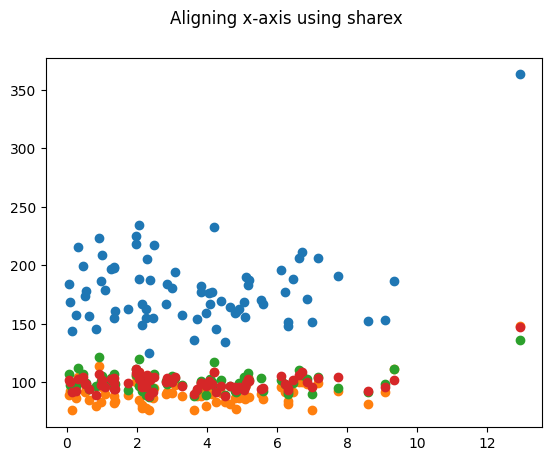

In [ ]:
fig, (ax1) = plt.subplots(1, sharex=True)
fig.suptitle('Aligning x-axis using sharex')
plt.scatter(y, weight)
# plt.scatter(height, y)
plt.scatter(y, abdomen)
# plt.scatter(neck, y)
plt.scatter(y, chest)
plt.scatter(y, hip)
# plt.scatter(thigh, y)
# plt.scatter(knee, y)
# plt.scatter(ankle, y)
# plt.scatter(biceps, y)
# plt.scatter(forearm, y)
# plt.scatter(wrist, y)

In [ ]:
# print("Model coeficients: \n")
# for i in range(x.shape[1]):
#     print(x.columns[i], "=", linRegModel(x_train).coef_[i].round(5))

### Shap

In [ ]:
# import shap

# x100 = shap.utils.sample(x, 100)

In [ ]:
# # compute the SHAP values for the linear model
# explainer = shap.Explainer(linRegModel(x_train).predict, x100)
# shap_values = explainer(x_train)

# # make a standard partial dependence plot
# sample_ind = 20

In [ ]:
# shap.plots.beeswarm(shap_values, max_display = 14)

In [ ]:
# some_data = x.iloc[:5]
# some_labels = y[:5]
# print('Predictions:\t', lin_reg.predict(some_data))
# print('Labels:\t\t', list(some_labels))

# Decision Tree Regression

### Model

In [89]:
# Model

from sklearn.tree import DecisionTreeRegressor

def treeRegModel(x_train, y_train = y_train):
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(x_train, y_train)
    return tree_reg

# compute the SHAP values for the linear model


In [91]:
# # Evaluating Model

def evaluatingTreeReg(feature_count, x_train, x_test):
    if feature_count < 2:
        print("For {} feature:".format(feature_count))
    else:
        print("For {} features:".format(feature_count))
    y_pred = treeRegModel(x_train).predict(x_test)
    print(explained_variance_score(y_test, y_pred).round(4))
    print(max_error(y_test, y_pred).round(4))
    print(mean_absolute_error(y_test, y_pred).round(4))
    print(mean_squared_error(y_test, y_pred).round(4))
    print(mean_squared_log_error(y_test, y_pred).round(4))
    print(median_absolute_error(y_test, y_pred).round(4))
    print(r2_score(y_test, y_pred).round(4))
    print(mean_absolute_percentage_error(y_test, y_pred).round(4), '\n') 
#     print('Absolute Error Score: ',d2_absolute_error_score(y_test, y_pred), '\n')
    return 0

print('Decision Tree Regression\n')
print("Pearson")
evaluatingTreeReg(5, x_pearson_train, x_pearson_test)
print("Chi-Squared")
evaluatingTreeReg(5, x_chi_train, x_chi_test)
print("RFE")
evaluatingTreeReg(5, x_rfe_train, x_rfe_test)
print("Lasso")
evaluatingTreeReg(5, x_lasso_train, x_lasso_test)
print("Embeded RF")
evaluatingTreeReg(5, x_embeded_rf_train, x_embeded_rf_test)
print("Correlation")
# evaluatingTreeReg(1, x1_train, x1_test)
# evaluatingTreeReg(2, x2_train, x2_test)
# evaluatingTreeReg(3, x3_train, x3_test)
# evaluatingTreeReg(4, x4_train, x4_test)
evaluatingTreeReg(5, x5_train, x5_test)
# evaluatingTreeReg(6, x6_train, x6_test)
# evaluatingTreeReg(7, x7_train, x7_test)
# evaluatingTreeReg(8, x8_train, x8_test)
# evaluatingTreeReg(9, x9_train, x9_test)
# evaluatingTreeReg(10, x10_train, x10_test)
# evaluatingTreeReg(11, x11_train, x11_test)
# evaluatingTreeReg(12, x12_train, x12_test)
# evaluatingTreeReg(13, x_train, x_test)

Decision Tree Regression

Pearson
For 5 features:
0.3777
14.4
4.6605
32.2566
0.139
4.2
0.3768
0.3491 

Chi-Squared
For 5 features:
0.3281
14.4
4.8342
35.3855
0.1629
4.15
0.3164
0.3409 

RFE
For 5 features:
-0.2288
27.1
6.4842
65.7437
0.313
5.5
-0.2701
0.5067 

Lasso
For 5 features:
0.1626
17.6
5.5461
43.3993
0.1749
5.35
0.1616
0.3458 

Embeded RF
For 5 features:
0.0203
17.6
6.0447
50.7137
0.1995
5.9
0.0202
0.4054 

Correlation
For 5 features:
0.3004
19.0
4.7961
36.2933
0.1443
4.05
0.2988
0.3655 



0

In [ ]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(tree_reg, x, y, scoring='neg_mean_squared_error', cv=10)
# rmse_scores = np.sqrt(-scores)

In [ ]:
# def display_scores(scores):
# print('Scores:', scores)
# print('Mean:', scores.mean())
# print('Standard deviation:', scores.std())

In [ ]:
# #display_scores(tree_rmse_scores)
# display_scores(rmse_scores)

In [ ]:
# lin_scores = cross_val_score(lin_reg, x, y, scoring='neg_mean_squared_error', cv=10)
# lin_rmse_scores = np.sqrt(-lin_scores)
# display_scores(lin_rmse_scores)

### Shap

In [ ]:
# explainer2 = shap.Explainer(tree_reg.predict, x100)
# shap_values2 = explainer2(x)

# shap.plots.waterfall(shap_values2[sample_ind], max_display = 14)

# Random Forest

### Model

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
# Model

def rfModel(x_train, y_train = y_train):
    rf = RandomForestRegressor(random_state = 42)
    rf.fit(x_train, y_train)
    return rf

In [94]:
# Evaluating Model

def evaluatingRF(feature_count, x_train, x_test):
    if feature_count < 2:
        print("For {} feature:".format(feature_count))
    else:
        print("For {} features:".format(feature_count))
    y_pred = rfModel(x_train).predict(x_test)
    print(explained_variance_score(y_test, y_pred).round(4))
    print(max_error(y_test, y_pred).round(4))
    print(mean_absolute_error(y_test, y_pred).round(4))
    print(mean_squared_error(y_test, y_pred).round(4))
    print(mean_squared_log_error(y_test, y_pred).round(4))
    print(median_absolute_error(y_test, y_pred).round(4))
    print(r2_score(y_test, y_pred).round(4))
    print(mean_absolute_percentage_error(y_test, y_pred).round(4), '\n')
    # y_pred_df = pd.DataFrame(y_pred, index=x_test.index)
    # df_teste = pd.concat([y_test, y_pred_df], axis=1)
    # print(df_teste)
    return 0

print('Random Forest\n')
print("Pearson")
evaluatingRF(5, x_pearson_train, x_pearson_test)
print("Chi-Squared")
evaluatingRF(5, x_chi_train, x_chi_test)
print("RFE")
evaluatingRF(5, x_rfe_train, x_rfe_test)
print("Lasso")
evaluatingRF(5, x_lasso_train, x_lasso_test)
print("Embeded RF")
evaluatingRF(5, x_embeded_rf_train, x_embeded_rf_test)
print("Correlation")
# evaluatingRF(1, x1_train, x1_test)
# evaluatingRF(2, x2_train, x2_test)
# evaluatingRF(3, x3_train, x3_test)
# evaluatingRF(4, x4_train, x4_test)
evaluatingRF(5, x5_train, x5_test)
# evaluatingRF(6, x6_train, x6_test)
# evaluatingRF(7, x7_train, x7_test)
# evaluatingRF(8, x8_train, x8_test)
# evaluatingRF(9, x9_train, x9_test)
# evaluatingRF(10, x10_train, x10_test)
# evaluatingRF(11, x11_train, x11_test)
# evaluatingRF(12, x12_train, x12_test)
# evaluatingRF(13, x_train, x_test)


Random Forest

Pearson
For 5 features:
0.6166
12.481
3.5965
19.8961
0.088
3.0745
0.6156
0.2728 

Chi-Squared
For 5 features:
0.5678
11.403
3.9006
22.4037
0.0969
3.6365
0.5672
0.2922 

RFE
For 5 features:
0.4676
11.081
4.5756
29.2085
0.1313
4.2845
0.4357
0.3721 

Lasso
For 5 features:
0.648
10.026
3.5758
18.2402
0.0805
3.1605
0.6476
0.2585 

Embeded RF
For 5 features:
0.5797
10.593
3.9578
21.8244
0.0921
3.6345
0.5784
0.2926 

Correlation
For 5 features:
0.6194
12.485
3.6057
19.7706
0.0875
3.054
0.618
0.2745 



0

### Insights

In [12]:
from array import array


y_pred = rfModel(x_train).predict(x_test)
mape =mean_absolute_percentage_error(y_test, y_pred).round(4)*100

bodyfat = bodyfat.filter(items = x_test.index, axis=0)

y_pred = y_pred.tolist()
d = {'y_test': y_test.round(2), 'y_pred': y_pred}
erro = pd.DataFrame(data=d)

bodyfat_erro = pd.concat([bodyfat, erro], axis=1)

bodyfat_erro['erro'] = bodyfat_erro['y_test'] - bodyfat_erro['y_pred']

In [13]:
weight = [bodyfat_erro.Weight]
height = [bodyfat_erro.Height]
age = [bodyfat_erro.Age]
abdomen = [bodyfat_erro.Abdomen]
neck = [bodyfat_erro.Neck]
chest = [bodyfat_erro.Chest]
hip = [bodyfat_erro.Hip]
thigh = [bodyfat_erro.Thigh]
knee = [bodyfat_erro.Knee]
ankle = [bodyfat_erro.Ankle]
biceps = [bodyfat_erro.Biceps]
forearm = [bodyfat_erro.Forearm]
wrist = [bodyfat_erro.Wrist]

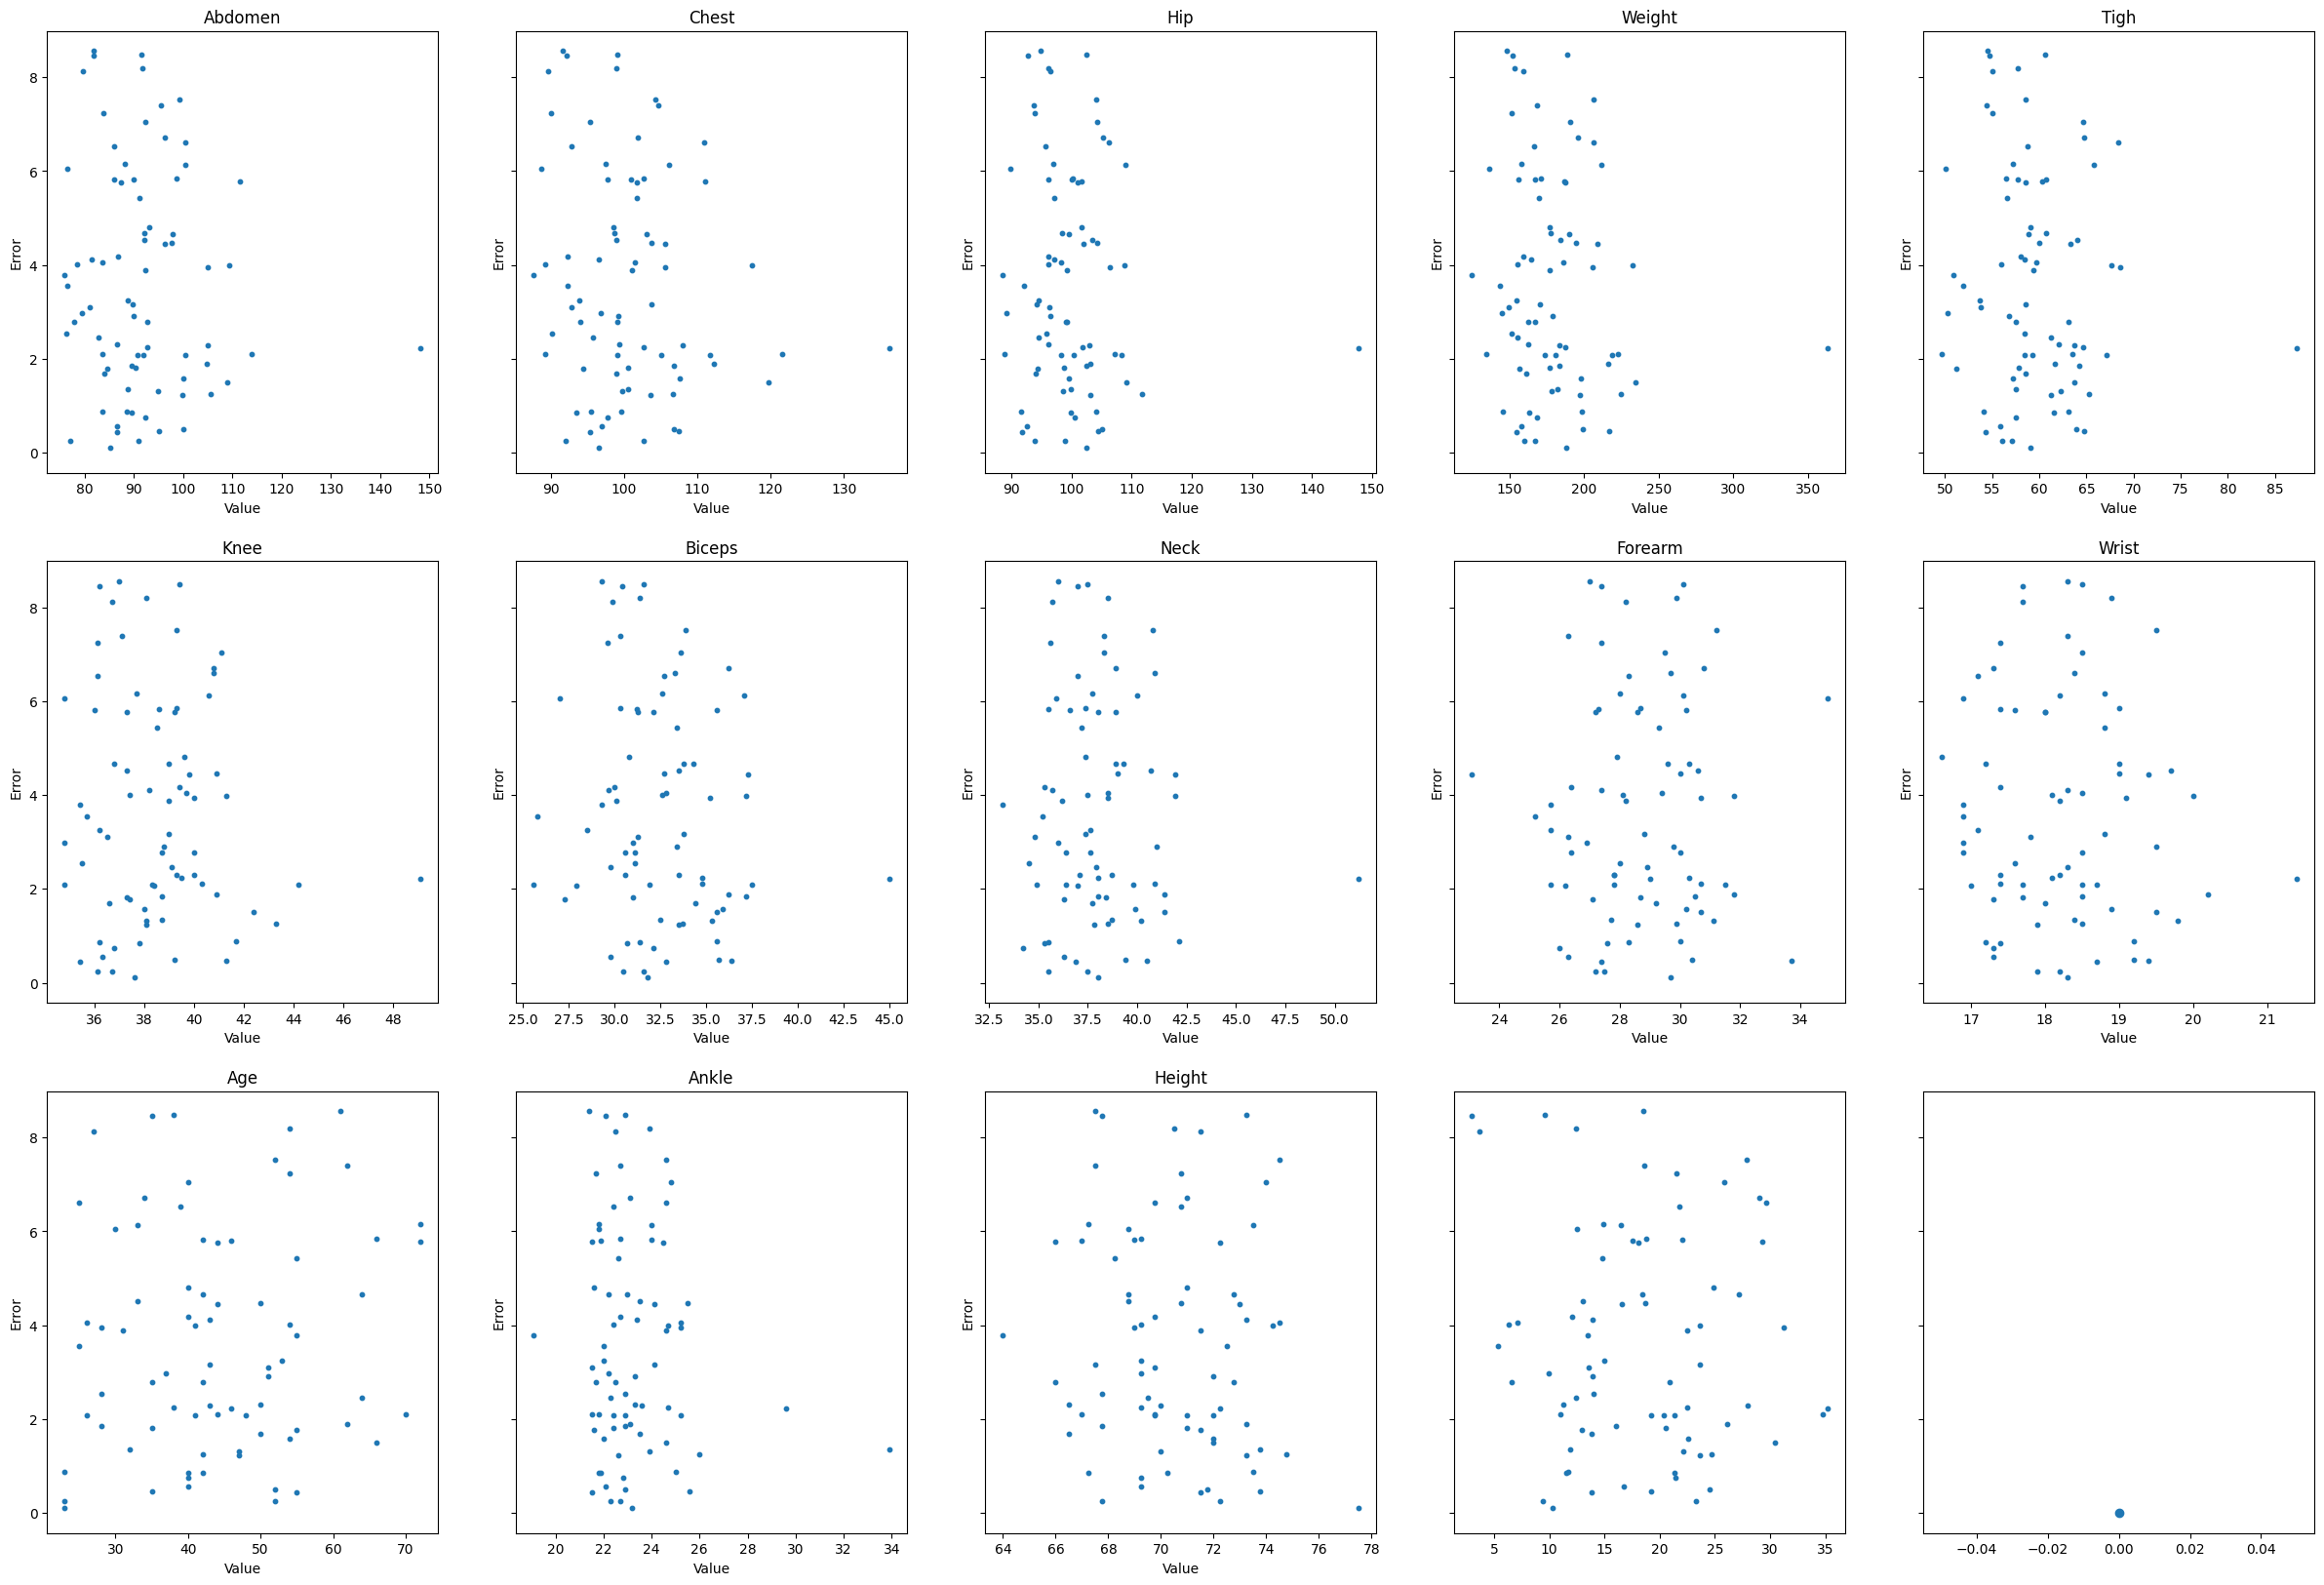

In [14]:
feature_names = ['Abdomen', 'Chest', 'Hip', 'Weight', 'Tigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist', 'Age', 'Ankle', 'Height']
fig2, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(ncols=5, nrows=3, sharey=True, figsize=(30,20))
y = bodyfat_erro['y_test']-bodyfat_erro['y_pred']
y = y.abs()

ax1.scatter(abdomen, y, s=10)
ax2.scatter(chest, y, s=10)
ax3.scatter(hip, y, s=10)
ax4.scatter(weight, y, s=10)
ax5.scatter(thigh, y, s=10)
ax6.scatter(knee, y, s=10)
ax7.scatter(biceps, y, s=10)
ax8.scatter(neck, y, s=10)
ax9.scatter(forearm, y, s=10)
ax10.scatter(wrist, y, s=10)
ax11.scatter(age, y, s=10)
ax12.scatter(ankle, y, s=10)
ax13.scatter(height, y, s=10)
ax14.scatter(y_test,y, s=10)
ax15.scatter(0,0)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13]
for i in range(len(feature_names)):
    axes[i].set_title(feature_names[i])
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Error')

In [ ]:
# MEAN ERROR (ALL TEST SET)
count_all = bodyfat_erro['erro'].count()
all = bodyfat_erro['erro'] = bodyfat_erro['erro'].abs()
all = all.mean()
print('For ALL data set''\n'
      'Available sample:' , count_all, '\n'
      'Mean Error:' , all.round(2),'\n')

# MEAN ERROR ULTRA LEAN (5 - 8)
ultra_lean = bodyfat_erro[(bodyfat_erro['BodyFat'] >= 5) & (bodyfat_erro['BodyFat'] <= 8)]
count_ultra_lean = ultra_lean['erro'].count()
ultra_lean = ultra_lean['erro'].abs()
ultra_lean = ultra_lean.mean()
print('Moderately Lean (5% to 8%)''\n'
      'Available sample:' , count_ultra_lean, '\n'
      'Mean Error:' , ultra_lean.round(2),'\n')

# MEAN ERROR LEAN (8 - 12) 
lean = bodyfat_erro[(bodyfat_erro['BodyFat'] > 8) & (bodyfat_erro['BodyFat'] <= 12)]
count_lean = lean['erro'].count()
lean = lean['erro'].abs()
lean = lean.mean()
print('Moderately Lean (8% to 12%)''\n'
      'Available sample:' , count_lean, '\n'
      'Mean Error:' , lean.round(2),'\n')

# MEAN ERROR MODERATELY LEAN (12 - 20)
moderately_lean = bodyfat_erro[(bodyfat_erro['BodyFat'] > 12) & (bodyfat_erro['BodyFat'] <= 20)]
count_moderately_lean = moderately_lean['erro'].count()
moderately_lean = moderately_lean['erro'].abs()
moderately_lean = moderately_lean.mean()
print('Moderately Lean (12% to 20%)''\n'
      'Available sample:' , count_moderately_lean, '\n'
      'Mean Error:' , moderately_lean.round(2),'\n')

# MEAN ERROR EXCESS FAT (20 - 30)
excess_fat = bodyfat_erro[(bodyfat_erro['BodyFat'] > 20) & (bodyfat_erro['BodyFat'] <= 30)]
count_excess_fat = excess_fat['erro'].count()
excess_fat = excess_fat['erro'].abs()
excess_fat = excess_fat.mean()
print('Excess Fat (20% to 30%)''\n'
      'Available sample:' , count_excess_fat, '\n'
      'Mean Error:' , excess_fat.round(2),'\n')

In [ ]:
# # Feature Selection

# from skfeature.function.similarity_based import fisher_score

In [ ]:
# from sklearn import metrics
# metrics.get_scorer_names()

### Shap

In [ ]:
# # SHAP

# explainer_rf = shap.Explainer(rf.predict, x_test)
# shap_values_rf = explainer_rf(x_test)

# shap.plots.waterfall(shap_values_rf[sample_ind], max_display = 14)

# XGBoost

### Model

In [ ]:
# Model
import xgboost as xgb
from xgboost import XGBRegressor

def xgboostModel(x_train, y_train = y_train):
    xgboost = XGBRegressor(max_depth = 5)
    xgboost.fit(x_train, y_train)
    return xgboost

In [ ]:
# Evaluating Model

def evaluatingXGBoost(feature_count, x_train, x_test):
    if feature_count < 2:
        print("For {} feature:".format(feature_count))
    else:
        print("For {} features:".format(feature_count))
    y_pred = xgboostModel(x_train).predict(x_test)
    print(explained_variance_score(y_test, y_pred).round(4))
    print(max_error(y_test, y_pred).round(4))
    print(mean_absolute_error(y_test, y_pred).round(4))
    print(mean_squared_error(y_test, y_pred).round(4))
    print(mean_squared_log_error(y_test, y_pred).round(4))
    print(median_absolute_error(y_test, y_pred).round(4))
    print(r2_score(y_test, y_pred).round(4))
    print(mean_absolute_percentage_error(y_test, y_pred).round(4), '\n') 
#     print('Absolute Error Score: ',d2_absolute_error_score(y_test, y_pred), '\n')
    return 0


print('XG Boost\n')
evaluatingXGBoost(5, x_pearson_train, x_pearson_test)
evaluatingXGBoost(5, x_chi_train, x_chi_test)
evaluatingXGBoost(5, x_rfe_train, x_rfe_test)
evaluatingXGBoost(5, x_lasso_train, x_lasso_test)
evaluatingXGBoost(5, x_embeded_rf_train, x_embeded_rf_test)
# evaluatingXGBoost(1, x1_train, x1_test)
# evaluatingXGBoost(2, x2_train, x2_test)
# evaluatingXGBoost(3, x3_train, x3_test)
# evaluatingXGBoost(4, x4_train, x4_test)
# evaluatingXGBoost(5, x5_train, x5_test)
# evaluatingXGBoost(6, x6_train, x6_test)
# evaluatingXGBoost(7, x7_train, x7_test)
# evaluatingXGBoost(8, x8_train, x8_test)
# evaluatingXGBoost(9, x9_train, x9_test)
# evaluatingXGBoost(10, x10_train, x10_test)
# evaluatingXGBoost(11, x11_train, x11_test)
# evaluatingXGBoost(12, x12_train, x12_test)
# evaluatingXGBoost(13, x_train, x_test)

### Insights

In [ ]:
from array import array


y_pred = rfModel(x_train).predict(x_test)
mape =mean_absolute_percentage_error(y_test, y_pred).round(4)*100

bodyfat = bodyfat.filter(items = x_test.index, axis=0)

y_pred = y_pred.tolist()
d = {'y_test': y_test.round(2), 'y_pred': y_pred}
erro = pd.DataFrame(data=d)

bodyfat_erro = pd.concat([bodyfat, erro], axis=1)

bodyfat_erro['erro'] = bodyfat_erro['y_test'] - bodyfat_erro['y_pred']

In [ ]:
weight = [bodyfat_erro.Weight]
height = [bodyfat_erro.Height]
age = [bodyfat_erro.Age]
abdomen = [bodyfat_erro.Abdomen]
neck = [bodyfat_erro.Neck]
chest = [bodyfat_erro.Chest]
hip = [bodyfat_erro.Hip]
thigh = [bodyfat_erro.Thigh]
knee = [bodyfat_erro.Knee]
ankle = [bodyfat_erro.Ankle]
biceps = [bodyfat_erro.Biceps]
forearm = [bodyfat_erro.Forearm]
wrist = [bodyfat_erro.Wrist]

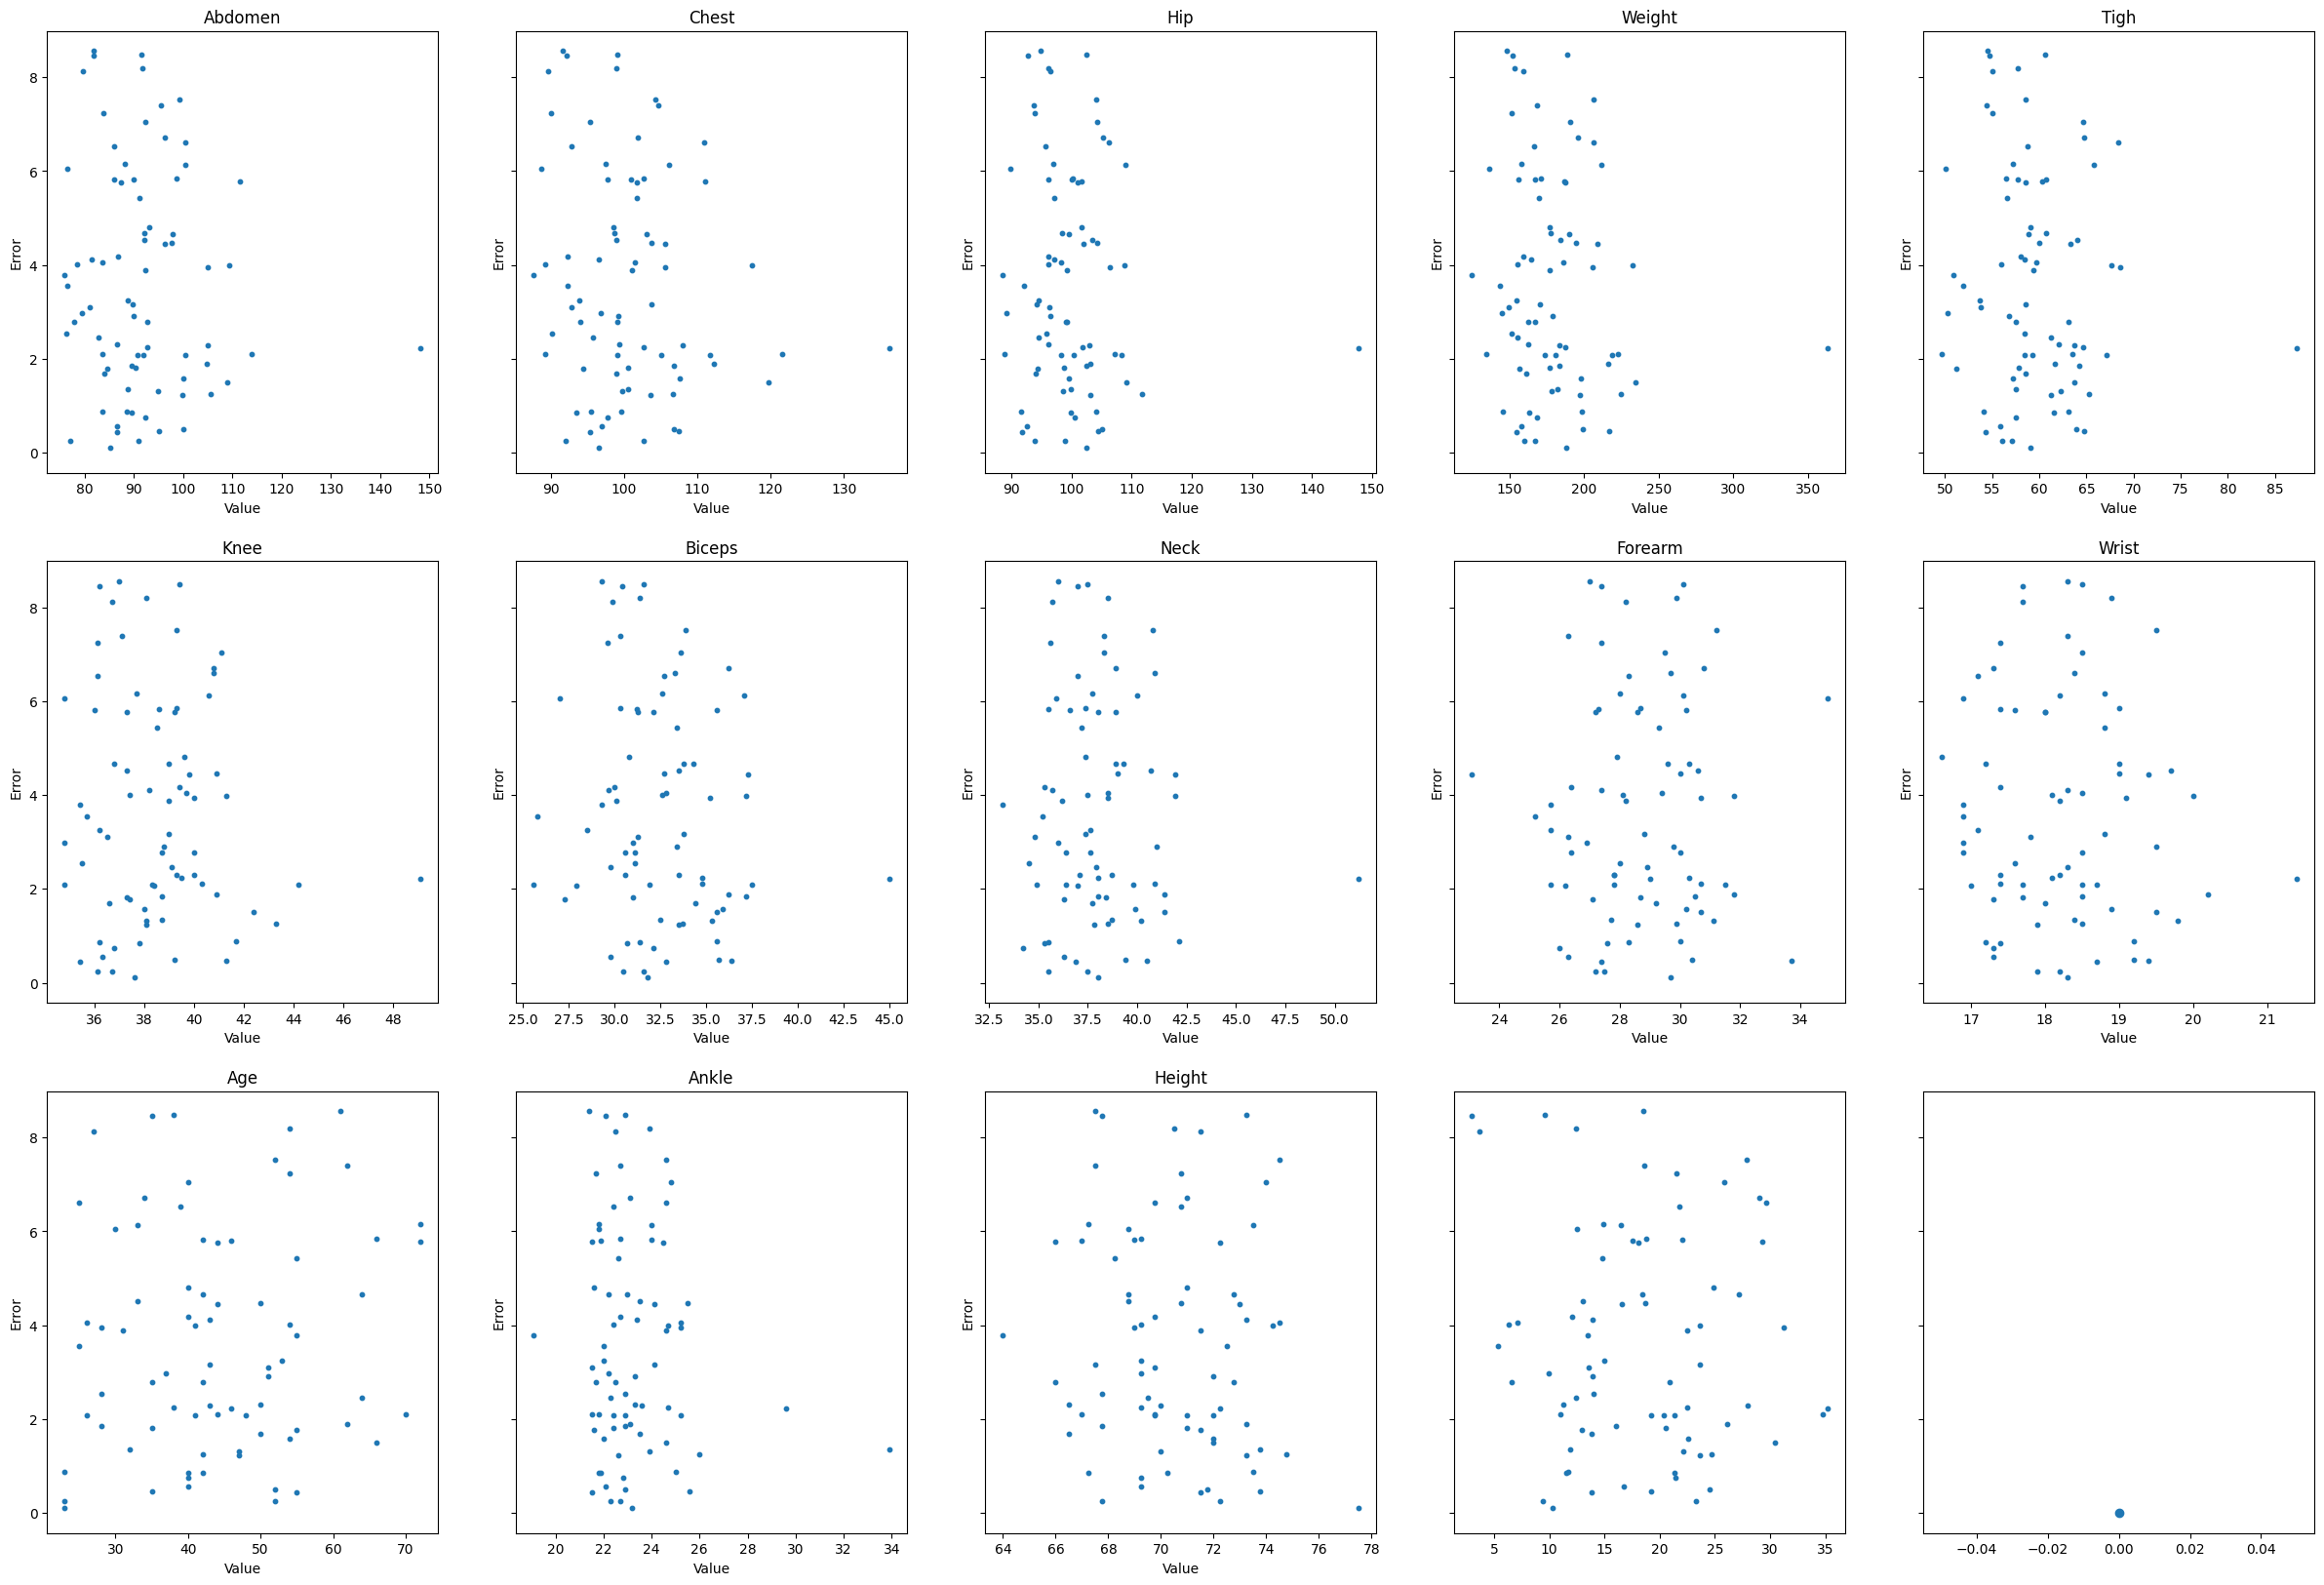

In [ ]:
feature_names = ['Abdomen', 'Chest', 'Hip', 'Weight', 'Tigh', 'Knee', 'Biceps', 'Neck', 'Forearm', 'Wrist', 'Age', 'Ankle', 'Height']
fig2, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(ncols=5, nrows=3, sharey=True, figsize=(30,20))
y = bodyfat_erro['y_test']-bodyfat_erro['y_pred']
y = y.abs()

ax1.scatter(abdomen, y, s=10)
ax2.scatter(chest, y, s=10)
ax3.scatter(hip, y, s=10)
ax4.scatter(weight, y, s=10)
ax5.scatter(thigh, y, s=10)
ax6.scatter(knee, y, s=10)
ax7.scatter(biceps, y, s=10)
ax8.scatter(neck, y, s=10)
ax9.scatter(forearm, y, s=10)
ax10.scatter(wrist, y, s=10)
ax11.scatter(age, y, s=10)
ax12.scatter(ankle, y, s=10)
ax13.scatter(height, y, s=10)
ax14.scatter(y_test,y, s=10)
ax15.scatter(0,0)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13]
for i in range(len(feature_names)):
    axes[i].set_title(feature_names[i])
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Error')

plt.show()

In [ ]:
# MEAN ERROR (ALL TEST SET)
count_all = bodyfat_erro['erro'].count()
all = bodyfat_erro['erro'] = bodyfat_erro['erro'].abs()
all = all.mean()
print('For ALL data set''\n'
      'Available sample:' , count_all, '\n'
      'Mean Error:' , all.round(2),'\n')

# MEAN ERROR ULTRA LEAN (5 - 8)
ultra_lean = bodyfat_erro[(bodyfat_erro['BodyFat'] >= 5) & (bodyfat_erro['BodyFat'] <= 8)]
count_ultra_lean = ultra_lean['erro'].count()
ultra_lean = ultra_lean['erro'].abs()
ultra_lean = ultra_lean.mean()
print('Moderately Lean (5% to 8%)''\n'
      'Available sample:' , count_ultra_lean, '\n'
      'Mean Error:' , ultra_lean.round(2),'\n')

# MEAN ERROR LEAN (8 - 12) 
lean = bodyfat_erro[(bodyfat_erro['BodyFat'] > 8) & (bodyfat_erro['BodyFat'] <= 12)]
count_lean = lean['erro'].count()
lean = lean['erro'].abs()
lean = lean.mean()
print('Moderately Lean (8% to 12%)''\n'
      'Available sample:' , count_lean, '\n'
      'Mean Error:' , lean.round(2),'\n')

# MEAN ERROR MODERATELY LEAN (12 - 20)
moderately_lean = bodyfat_erro[(bodyfat_erro['BodyFat'] > 12) & (bodyfat_erro['BodyFat'] <= 20)]
count_moderately_lean = moderately_lean['erro'].count()
moderately_lean = moderately_lean['erro'].abs()
moderately_lean = moderately_lean.mean()
print('Moderately Lean (12% to 20%)''\n'
      'Available sample:' , count_moderately_lean, '\n'
      'Mean Error:' , moderately_lean.round(2),'\n')

# MEAN ERROR EXCESS FAT (20 - 30)
excess_fat = bodyfat_erro[(bodyfat_erro['BodyFat'] > 20) & (bodyfat_erro['BodyFat'] <= 30)]
count_excess_fat = excess_fat['erro'].count()
excess_fat = excess_fat['erro'].abs()
excess_fat = excess_fat.mean()
print('Excess Fat (20% to 30%)''\n'
      'Available sample:' , count_excess_fat, '\n'
      'Mean Error:' , excess_fat.round(2),'\n')

For ALL data set
Available sample: 76 
Mean Error: 3.62 

Moderately Lean (5% to 8%)
Available sample: 4 
Mean Error: 3.6 

Moderately Lean (8% to 12%)
Available sample: 9 
Mean Error: 2.15 

Moderately Lean (12% to 20%)
Available sample: 29 
Mean Error: 4.09 

Excess Fat (20% to 30%)
Available sample: 28 
Mean Error: 3.45 



### Shap

In [ ]:
# explainer_xgb = shap.Explainer(xgboost.predict, x100)
# shap_values_xgb = explainer_xgb(x)

# shap.plots.waterfall(shap_values_xgb[sample_ind], max_display = 14)

# Support Vector Regressor

### Model

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #???
regressor.fit(x, y)

ValueError: Found input variables with inconsistent numbers of samples: [252, 76]

In [ ]:
y_pred = regressor.predict(x_test)
print('Explained Variance Score: ',explained_variance_score(y_test, y_pred))
print('Max Error: ',max_error(y_test, y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ',mean_squared_error(y_test, y_pred))
print('Mean Squared Log Error: ',mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error: ',median_absolute_error(y_test, y_pred))
print('R2: ',r2_score(y_test, y_pred))
print('Mean Absolute Percentage Error: ',mean_absolute_percentage_error(y_test, y_pred), '\n') 
# print('Absolute Error Score: ',d2_absolute_error_score(y_test, y_pred), )